In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
# Load the dataset with no headers
df = pd.read_csv('/content/twitter_training.csv', header=None)

# Assign column names
df.columns = ['entity', 'sentiment', 'tweet_id', 'tweet']

# Display first few rows
df.head()


,entity,sentiment,tweet_id,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Check class balance
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (74682, 4)

Sentiment distribution:
sentiment
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077  

In [17]:
import re

def clean_text(text):
    # Convert the input to string to handle potential float values
    text = str(text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    return text.strip()

df['clean_tweet'] = df['tweet'].apply(clean_text)

# Show before and after cleaning
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [18]:
df['tweet_length'] = df['clean_tweet'].apply(len)
df['word_count'] = df['clean_tweet'].apply(lambda x: len(x.split()))

# Display new features
df[['tweet_length', 'word_count']].describe()


,tweet_length,word_count
count,74682.000000,74682.000000
mean,98.963740,17.950497
std,74.338933,13.726128
min,0.000000,0.000000
25%,41.000000,7.000000
50%,82.000000,14.000000
75%,139.000000,25.000000
max,918.000000,166.000000


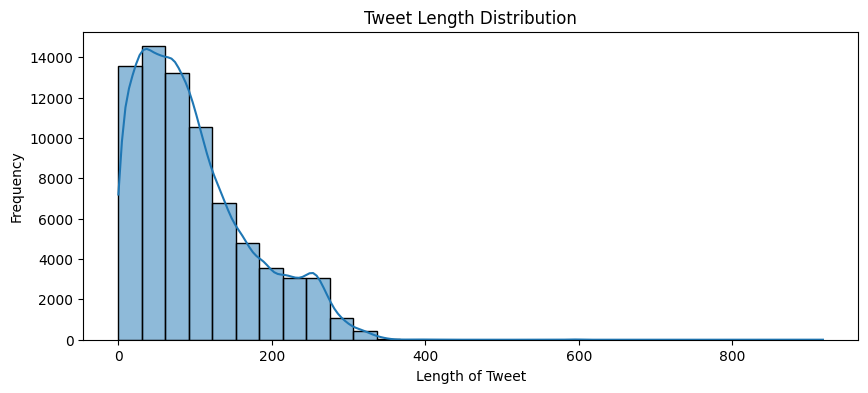

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()


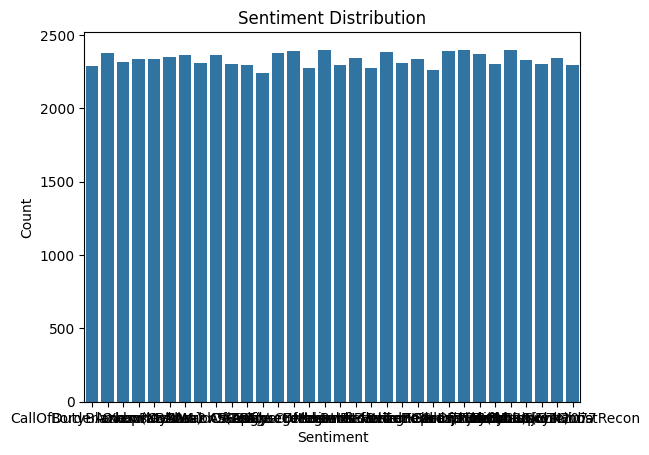

In [20]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


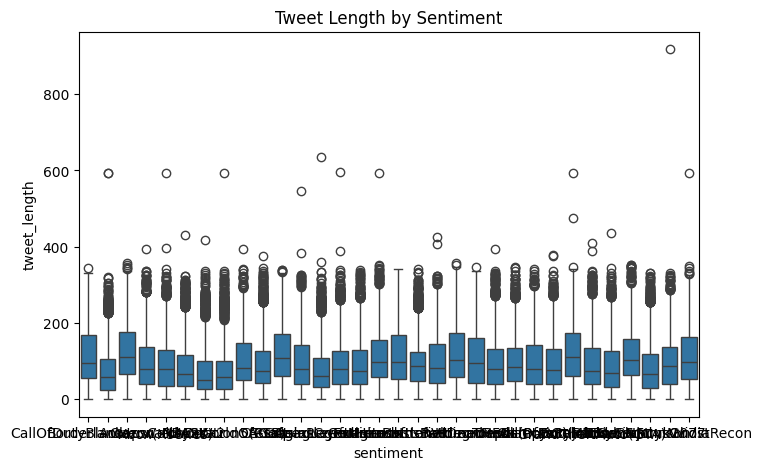

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Check mapping
dict(zip(le.classes_, le.transform(le.classes_)))


{'Amazon': np.int64(0),
 'ApexLegends': np.int64(1),
 'AssassinsCreed': np.int64(2),
 'Battlefield': np.int64(3),
 'Borderlands': np.int64(4),
 'CS-GO': np.int64(5),
 'CallOfDuty': np.int64(6),
 'CallOfDutyBlackopsColdWar': np.int64(7),
 'Cyberpunk2077': np.int64(8),
 'Dota2': np.int64(9),
 'FIFA': np.int64(10),
 'Facebook': np.int64(11),
 'Fortnite': np.int64(12),
 'Google': np.int64(13),
 'GrandTheftAuto(GTA)': np.int64(14),
 'Hearthstone': np.int64(15),
 'HomeDepot': np.int64(16),
 'LeagueOfLegends': np.int64(17),
 'MaddenNFL': np.int64(18),
 'Microsoft': np.int64(19),
 'NBA2K': np.int64(20),
 'Nvidia': np.int64(21),
 'Overwatch': np.int64(22),
 'PlayStation5(PS5)': np.int64(23),
 'PlayerUnknownsBattlegrounds(PUBG)': np.int64(24),
 'RedDeadRedemption(RDR)': np.int64(25),
 'TomClancysGhostRecon': np.int64(26),
 'TomClancysRainbowSix': np.int64(27),
 'Verizon': np.int64(28),
 'WorldOfCraft': np.int64(29),
 'Xbox(Xseries)': np.int64(30),
 'johnson&johnson': np.int64(31)}

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['tweet_length', 'word_count']]
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


                                   precision    recall  f1-score   support

                           Amazon       0.11      0.09      0.10       463
                      ApexLegends       0.06      0.06      0.06       477
                   AssassinsCreed       0.02      0.02      0.02       419
                      Battlefield       0.14      0.20      0.16       468
                      Borderlands       0.03      0.03      0.03       451
                            CS-GO       0.05      0.07      0.06       427
                       CallOfDuty       0.06      0.05      0.06       477
        CallOfDutyBlackopsColdWar       0.08      0.11      0.09       481
                    Cyberpunk2077       0.04      0.04      0.04       462
                            Dota2       0.08      0.12      0.09       474
                             FIFA       0.05      0.05      0.05       449
                         Facebook       0.07      0.07      0.07       477
                        

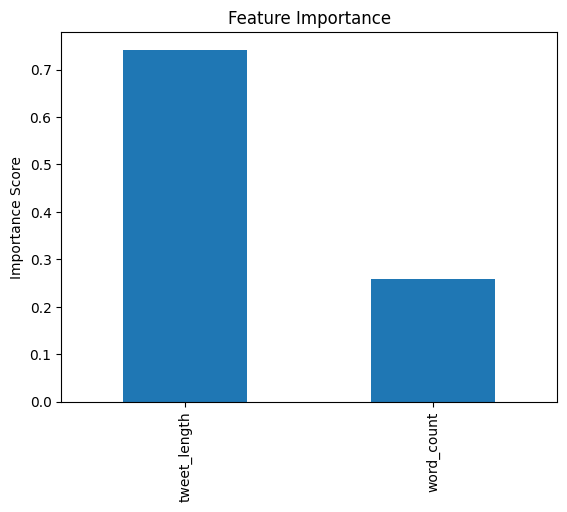

In [27]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feature_importance.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()
